In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import nltk
from nltk.tokenize import word_tokenize
import contractions
import seaborn as sns

nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/koechian/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Loading Scraped Data and Cleaning

In [14]:
# Loading in Data and cleaning

path = '../../scrapers/Outputs/jobs'
# df =pd.DataFrame()
temp =[]

for index, file in enumerate(os.listdir(path)):
    print(f'Loaded batch {index + 1}')
    try:
      with open(f'{path}/{file}') as jsonfile:
        data = pd.DataFrame.from_dict(json.load(jsonfile), orient='index')
        temp.append(data)
    except UnicodeDecodeError:
        print('Skipping due to unicode error')


Loaded batch 1
Loaded batch 2
Loaded batch 3
Loaded batch 4
Skipping due to unicode error
Loaded batch 5
Loaded batch 6
Loaded batch 7
Loaded batch 8
Loaded batch 9
Loaded batch 10
Loaded batch 11
Loaded batch 12
Loaded batch 13
Loaded batch 14
Loaded batch 15


In [3]:
# Concatenating output into one DataFrame
df = pd.concat(temp, ignore_index =True)
df.sample(2)

,title,location,nature,description,url
308,Senior C++ Game Developer,Remote (Remote),Full Time,Job DescriptionWe at Playrix are certain that ...,https://codingkenya.com/job/senior-c-game-deve...
195,Android Software Engineering Intern,Nairobi,Full Time,"As a software engineering intern, you will wor...",https://www.myjobmag.co.ke/job/android-softwar...


In [4]:
# Dropping listings without description
df = df[df["description"] != "None"]
df.shape

(760, 5)

- Cleaning up Location Field

In [5]:
# Renaming remote locations to only remote
df.loc[df['location'].str.contains('remote', case=False, regex=False), 'location'] = 'Remote'

# Remove occurrences of the word "County"
df['location'] = df['location'].str.replace(r' County', '', regex=True)


# Splitting the 'location' column into 'city' and 'county' columns
df[['city', 'county']] = df['location'].str.split(',| ', expand=True, n=1)

df.sample(6)

,title,location,nature,description,url,city,county
328,Data Analyst,"Nairobi, Kenya",Full Time,PurposeWe are looking for a Data Analyst to jo...,https://codingkenya.com/job/data-analyst-3/,Nairobi,Kenya
426,"Cloud Support Eng. I (Databases), Support Engi...",Nairobi,Full Time,Amazon Web Services is the market leader and t...,https://www.brightermonday.co.ke/listings/clou...,Nairobi,None
311,Senior Backend Engineer,"Nairobi, Kenya",Full Time,Role OverviewWe are looking for a Senior Backe...,https://codingkenya.com/job/senior-backend-eng...,Nairobi,Kenya
688,Information Security Risk & Compliance Officer,Nairobi,Remote,Role Purpose: The Information Security Risk an...,https://www.myjobmag.co.ke/job/information-sec...,Nairobi,None
287,Principle Engineer – Security,"Nairobi, Kenya",Full Time,Principal Security Engineer / Head of IT and S...,https://codingkenya.com/job/principle-engineer...,Nairobi,Kenya
593,"Lead, Data Pricing and Solutions",Nairobi,Full Time,Airtel Kenya wishes to recruit for the positio...,https://www.myjobmag.co.ke/job/lead-data-prici...,Nairobi,None


- Removing Contractions such as shouldn't 

In [6]:
#Extracting Job Descriptions
descriptions_df = df['description'].to_frame()
descriptions_df.sample(10)

,description
315,JOB DESCRIPTION We are pleased to announce the...
750,Job DescriptionWe are looking for a Senior Ser...
535,About the jobWe are hiring an iOS Developer. W...
466,The role:The Senior Backend Developer role wor...
197,"About This Job:On behalf of our client, we are..."
88,The JobThe Mobile Engineer will be responsible...
224,The RoleThis is a full-time role based in Nair...
276,"About Ona.The world's leading humanitarian, de..."
301,About the jobSeveral Java Software Engineers a...
94,Have a MSc in Geomatics/Geodesy/Geospatial Inf...


In [8]:
df['description'] = df['description'].str.replace(r'CLICK HERE\b.*', '', regex=True, case=False)
descriptions_df['description'] = descriptions_df['description'].apply(lambda x: [contractions.fix(word) for word in x.split()])

#cocatenating items back into a single string
descriptions_df['description'] = [' '.join(map(str, l)) for l in descriptions_df['description']]
descriptions_df.sample(10, random_state = 5)

,description
37,Job DescriptionAs the Senior C# Cross Platform...
273,About the jobWhat we are buildingOvermind is a...
212,About the jobWe are seeking an experienced and...
552,About KOKO NetworksKOKO Networks is a venture-...
365,The team you will be part ofAs Nokia's growth ...
689,Key Duties and Responsibilities Drive Bank's p...
208,About the Role We are looking for an accomplis...
12,"QUALIFICATIONS,REQUIREMENTS, DUTIES AND RESPON..."
104,About The JobGoogle's Senior Software Engineer...
575,Job Purpose The Role holder will be responsibl...


In [9]:
# Noise removal and tokenization

descriptions_df['description'] = descriptions_df['description'].str.lower()
descriptions_df['description'] = descriptions_df['description'].apply(lambda x: re.sub(r'[^\w\d\s\']+', '', x))


#nltk tokenization
descriptions_df['tokenized'] = descriptions_df['description'].apply(word_tokenize)
descriptions_df.sample(10)

,description,tokenized
157,duties basic function of the position incumben...,"[duties, basic, function, of, the, position, i..."
113,about the jobdrive the future of collaborative...,"[about, the, jobdrive, the, future, of, collab..."
518,smg service management group is looking for a...,"[smg, service, management, group, is, looking,..."
341,job summarythe wikimedia foundation is looking...,"[job, summarythe, wikimedia, foundation, is, l..."
731,about this role as the lead software engineer ...,"[about, this, role, as, the, lead, software, e..."
663,the position this is an exciting time to join ...,"[the, position, this, is, an, exciting, time, ..."
231,job descriptionwe are looking for a principle ...,"[job, descriptionwe, are, looking, for, a, pri..."
446,job summary the monitoring and evaluation me o...,"[job, summary, the, monitoring, and, evaluatio..."
588,about the rolewe are looking for an experience...,"[about, the, rolewe, are, looking, for, an, ex..."
724,the opportunityrequirementslooking for a servi...,"[the, opportunityrequirementslooking, for, a, ..."


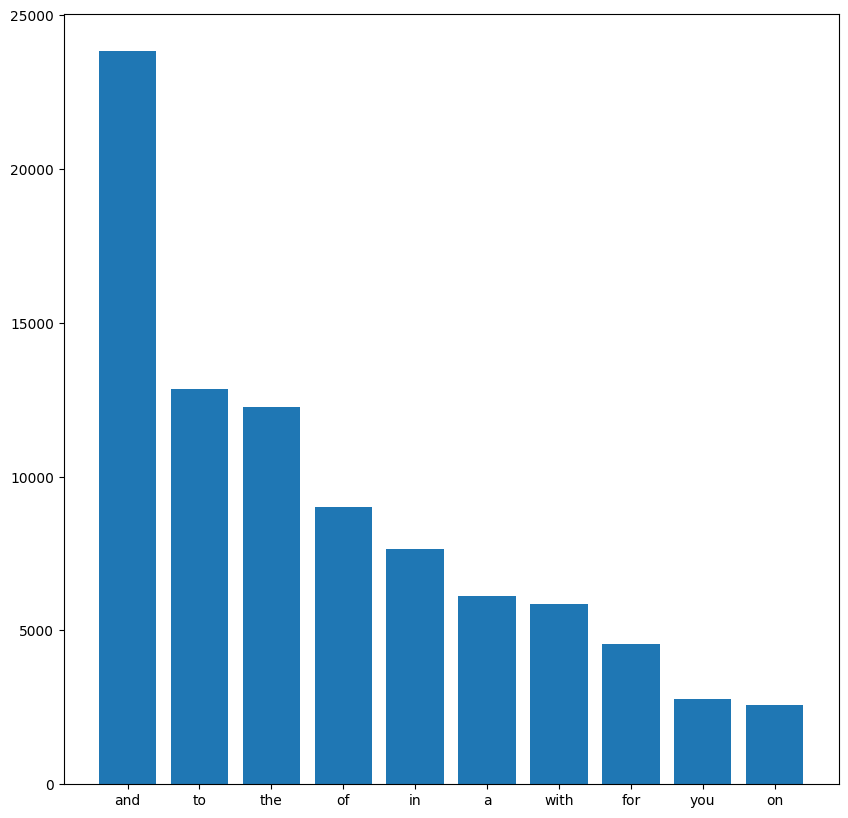

In [10]:
# Stop Word Analysis and removal
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

plot_top_stopwords_barchart(descriptions_df['description'])

### Exploratory Analysis

<Axes: xlabel='city', ylabel='Counts'>

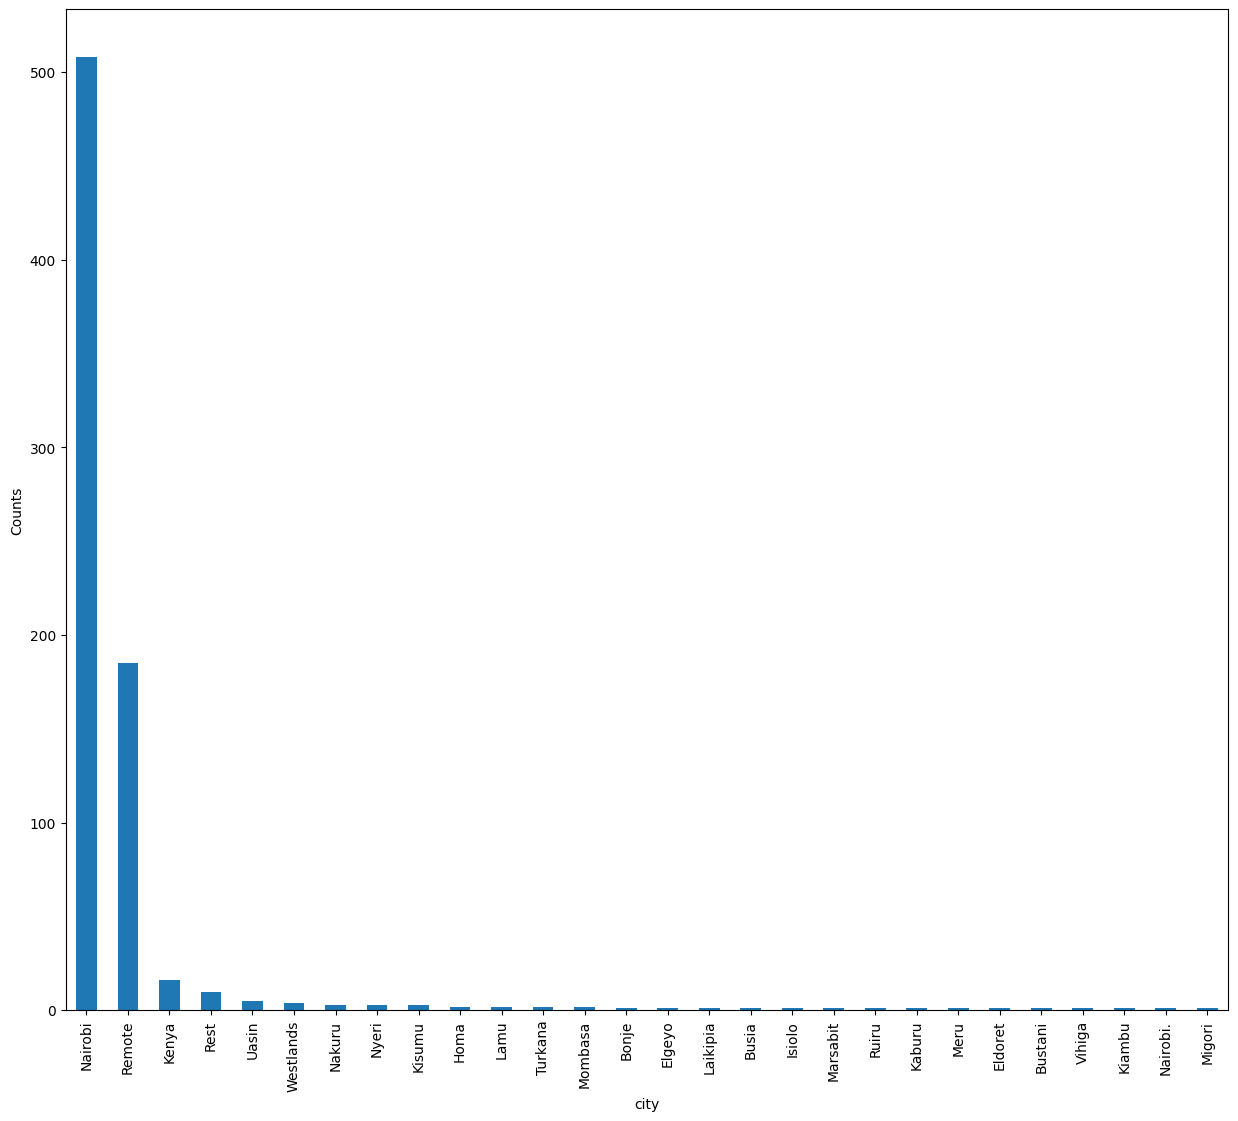

In [11]:
plt.figure(figsize=(15,13))

plt.xlabel("City")
plt.ylabel("Counts")
df["city"].value_counts().plot(kind='bar')

In [12]:
print(f'There are {len(df["title"].unique())} unique Job titles out of {df.shape[0]} entries')

# Using the Job Titles as a metric for analysis need the titles to be further evaluated. out of 700 Jobs, there are 600 unique ones, meaning alot of job titles have been over lapped.

There are 642 unique Job titles out of 760 entries


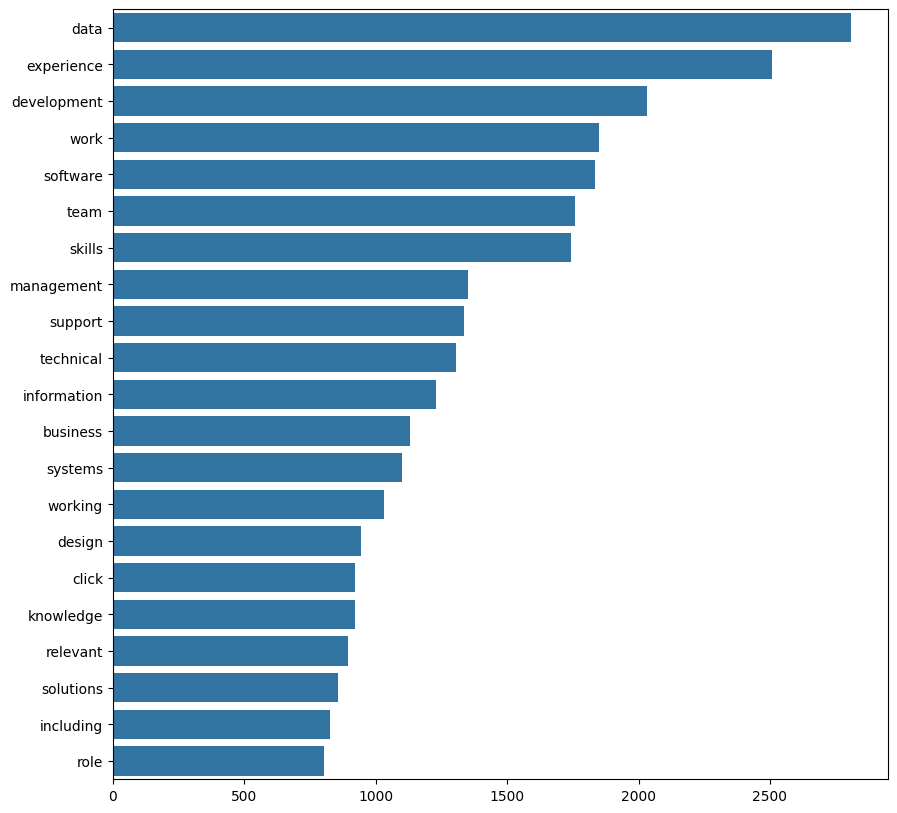

In [13]:
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
    plt.figure(figsize=(10,10))
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(descriptions_df['description'])

## Verdict

- Some of the data in the exploratory analysis could be used in the final front end
- Data such as locations is clean enough for usage. 
- Skills will have to be extracted via a model
- N-Gram and NER was a failure